### The Goal of this model is that by traning and testing model if i enter new student data so this model tell us He or She will get placement or not

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        96 non-null     float64
 2   iq          97 non-null     float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


,Unnamed: 0,cgpa,iq,placement
count,100.000000,96.000000,97.000000,100.000000
mean,49.500000,5.985417,124.123711,0.500000
std,29.011492,1.163025,40.229616,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.000000,103.000000,0.000000
50%,49.500000,6.000000,128.000000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [4]:
df.shape

(100, 4)

In [5]:
df.isnull().sum()

Unnamed: 0    0
cgpa          4
iq            3
placement     0
dtype: int64

# Pre-processing

In [6]:
df[['cgpa', 'iq']] = df[['cgpa', 'iq']].fillna(df[['cgpa', 'iq']].mean())

df[['cgpa','iq']]

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


### Removing Unnecessary Columns

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


### EDA

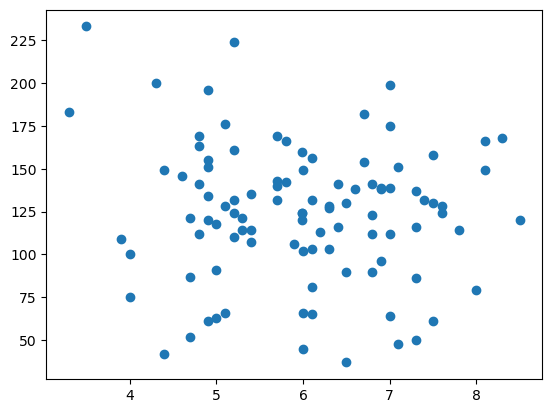

In [10]:
plt.scatter(df['cgpa'], df['iq'])

# Extract Input and output columns

In [11]:
X = df.iloc[:, :2]
Y = df.iloc[:, -1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


# Train test split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [15]:
X_train

,cgpa,iq
76,4.9,155.0
39,4.6,146.0
13,6.4,116.0
84,5.7,169.0
37,8.1,149.0
...,...,...
9,5.1,66.0
7,5.0,63.0
97,6.7,182.0
58,8.0,79.0


In [17]:
Y_train

76    0
39    0
13    1
84    0
37    1
     ..
9     0
7     0
97    1
58    1
80    0
Name: placement, Length: 80, dtype: int64

In [18]:
X_test

,cgpa,iq
45,6.000000,66.0
10,6.000000,45.0
75,4.800000,169.0
29,7.000000,112.0
5,7.100000,48.0
49,5.400000,135.0
92,5.200000,110.0
36,5.700000,140.0
38,5.985417,160.0
79,6.500000,90.0


In [19]:
Y_test

45    1
10    1
75    0
29    1
5     1
49    0
92    0
36    0
38    1
79    1
57    1
73    0
31    0
34    0
32    1
43    1
0     1
15    0
62    0
6     0
Name: placement, dtype: int64

# Scale the Value

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [21]:
X_train_scaled

array([[-0.93973805,  0.7437096 ],
       [-1.19214025,  0.51581364],
       [ 0.3222729 , -0.24383953],
       [-0.26666554,  1.09821441],
       [ 1.75255199,  0.59177896],
       [ 0.74294322,  0.33856124],
       [ 1.75255199,  1.0222491 ],
       [ 0.91121135,  0.64242251],
       [-0.09839742, -0.49705726],
       [ 0.74294322, -0.75027498],
       [-1.02387212, -0.34512662],
       [-1.69694463, -1.28203221],
       [ 1.07947948, -0.24383953],
       [-1.10800618, -0.11723067],
       [-0.0265329 , -0.04126535],
       [-0.01426335,  0.59177896],
       [-0.85560399, -0.19319599],
       [ 0.82707728,  1.25014505],
       [-0.0265329 , -0.14255244],
       [-0.93973805,  0.21195237],
       [ 1.16361354,  0.16130883],
       [-0.68733586,  0.89564023],
       [ 0.06987071, -0.57302258],
       [-0.93973805, -0.14255244],
       [-0.18253148,  0.41452655],
       [ 0.74294322,  0.31323946],
       [ 1.2477476 , -1.63653702],
       [ 1.07947948,  0.28791769],
       [ 0.40640697,

In [22]:
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[-0.01426335, -1.50992816],
       [-0.01426335, -2.04168539],
       [-1.02387212,  1.09821441],
       [ 0.82707728, -0.34512662],
       [ 0.91121135, -1.96572007],
       [-0.51906774,  0.23727415],
       [-0.68733586, -0.39577017],
       [-0.26666554,  0.36388301],
       [-0.0265329 ,  0.87031846],
       [ 0.40640697, -0.90220562],
       [ 0.40640697,  0.11066528],
       [-0.93973805, -1.63653702],
       [-1.78107869, -0.42109194],
       [-1.02387212,  0.94628378],
       [ 0.82707728,  0.33856124],
       [ 0.65880916,  0.38920478],
       [ 0.65880916, -0.06658713],
       [-0.77146993,  1.27546682],
       [-0.01426335, -0.59834435],
       [-0.26666554,  0.43984833]])

# Train the Model

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Model Traning
lr.fit(X_train, Y_train)

LogisticRegression()

# Evaluate the model / Model Selection

In [24]:
y_pred = lr.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [26]:
Y_test

45    1
10    1
75    0
29    1
5     1
49    0
92    0
36    0
38    1
79    1
57    1
73    0
31    0
34    0
32    1
43    1
0     1
15    0
62    0
6     0
Name: placement, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score

# Find Accuracy
accuracy_score(Y_test, y_pred)

0.9

## Desicion Boundry

C:\Users\Om\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

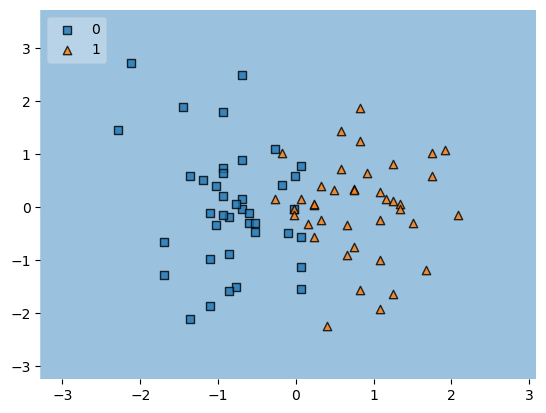

In [35]:
from mlxtend.plotting import plot_decision_regions

# plot_decision_regions(X_train.values, Y_train.values, clf = lr ,legend = 2)
plot_decision_regions(X_train_scaled, Y_train.values, clf = lr ,legend = 2)

# Exporting Model

In [36]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))